# Introduction And Problem Statement : 

* **The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.**

* **Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.**

## **Table of Contents:**

* **Basic feature extraction using text data.**
    * 1.Number of words
    * 2.Number of characters
    * 3.Average word length
    * 4.Number of stopwords
    * 5.Number of special characters
    * 6.Number of numerics
    * 7.Number of uppercase words
* **Basic Text Pre-processing of text data:**
    * 1.Lower casing
    * 2.Punctuation removal
    * 3.Stopwords removal
    * 4.Frequent words removal
    * 5.Rare words removal
    * 6.Spelling correction
    * 7.Tokenization
    * 8.Stemming
    * 9.Lemmatization
* **Advance Text Processing:**
    * 1.N-grams
    * 2.Term Frequency
    * 3.Inverse Document Frequency
    * 4.Term Frequency-Inverse Document Frequency (TF-IDF)
    * 5.Bag of Words
    * 6.Sentiment Analysis
    * 7.Word Embedding

## Important Definations : 

* **`Covariance :`**
**Covariance indicates how two variables are related (In our case, It’s Subjectivity and Polarity). A positive covariance means the variables are positively related and they move in the same direction, while a negative covariance means the variables are inversely related and they move in opposite directions.**


* **`Correlation :`**
**Correlation is another way to determine how two variables are related. In addition to telling you whether variables are positively or inversely related, correlation also tells you the degree to which the variables tend to move together.**

# 1.0 Importing Libraries and dataset :

### 0.0 Adding boundaries to the dataframes

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

### 0.1 Adding Multiple outputs to the output cell : 

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 0.2 Horizantal display in output cell : 

In [3]:
# For easier understanding 

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

### 0.3 Importing relevant libraries

In [4]:
# ! pip install autocorrect
# nltk.download('stopwords')
# nltk.download('wordnet')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [37]:
# importing the dataset : 

train = pd.read_csv('train_E6oV3lV.csv')
train.head()
train.shape

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


(31962, 3)

# 2.0 Basic feature extraction using text data

## 2.1 Number of words: 

* **t. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.**

In [38]:
train['word_count'] = train['tweet'].apply(lambda x: len(str(x).split(" ")))
train[['tweet','word_count']].head()

,tweet,word_count
0,@user when a father is dysfunctional and is s...,21
1,@user @user thanks for #lyft credit i can't us...,22
2,bihday your majesty,5
3,#model i love u take with u all the time in ...,17
4,factsguide: society now #motivation,8


## 2.2 Number of characters:

In [39]:
train['char_count'] = train['tweet'].str.len() ## this also includes spaces
train[['tweet','char_count']].head()

,tweet,char_count
0,@user when a father is dysfunctional and is s...,102
1,@user @user thanks for #lyft credit i can't us...,122
2,bihday your majesty,21
3,#model i love u take with u all the time in ...,86
4,factsguide: society now #motivation,39


## 2.3 Average Word Length

* **This can also potentially help us in improving our model.**

`we simply take the sum of the length of all the words and divide it by the total length of the tweet.`

In [40]:
# define function to calculate the avg word length

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

print('\n\nAVERAGE WORD LENGTH\n\n')

train['avg_word'] = train['tweet'].apply(lambda x: avg_word(x))
print(train[['tweet','avg_word']].head())



AVERAGE WORD LENGTH


                                               tweet  avg_word
0   @user when a father is dysfunctional and is s...  4.555556
1  @user @user thanks for #lyft credit i can't us...  5.315789
2                                bihday your majesty  5.666667
3  #model   i love u take with u all the time in ...  4.928571
4             factsguide: society now    #motivation  8.000000


## 2.4.Number of stopwords

In [41]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['stopwords'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['tweet','stopwords']].head()

,tweet,stopwords
0,@user when a father is dysfunctional and is s...,10
1,@user @user thanks for #lyft credit i can't us...,5
2,bihday your majesty,1
3,#model i love u take with u all the time in ...,5
4,factsguide: society now #motivation,1


## 2.5 Number of special characters : 

` One more interesting feature which we can extract from a tweet is calculating the number of hashtags or mentions present in it. This also helps in extracting extra information from our text data.`

`Here, we make use of the ‘starts with’ function because hashtags (or mentions) always appear at the beginning of a word.`

In [42]:
train['hastags'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['tweet','hastags']].head()

,tweet,hastags
0,@user when a father is dysfunctional and is s...,1
1,@user @user thanks for #lyft credit i can't us...,3
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,1
4,factsguide: society now #motivation,1


## 2.6 Number of numerics : 

In [43]:
train['numerics'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['tweet','numerics']].head()

,tweet,numerics
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


## 2.7 Number of Uppercase words : 

* **Anger or rage is quite often expressed by writing in UPPERCASE words which makes this a necessary operation to identify those words.**

In [44]:
train['upper'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['tweet','upper']].head()

,tweet,upper
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


# 3.0 Basic Preprocessing : 

## 3.1 Lower case : 

In [45]:
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['tweet'].head()

0    @user when a father is dysfunctional and is so...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model i love u take with u all the time in ur...
4                  factsguide: society now #motivation
Name: tweet, dtype: object

## 3.2 Removing Punctuation

In [46]:
train['tweet'] = train['tweet'].str.replace('[^\w\s]','')
train['tweet'].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model i love u take with u all the time in urð...
4                    factsguide society now motivation
Name: tweet, dtype: object

## 3.3 Removal of Stop Words

In [47]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3                model love u take u time urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

## 3..4 Common word removal : 

In [48]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[:10]
freq

user     17473
love      2647
ð         2511
day       2199
â         1797
happy     1663
amp       1582
im        1139
u         1136
time      1110
dtype: int64

* **Now, let’s remove these words as their presence will not of any use in classification of our text data.**

In [49]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

## 3.5 Rare words removal : 

* **Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts**

In [50]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[-10:]
freq

makati                                     1
woult                                      1
entrepeneur                                1
childrenofcolor                            1
carmen                                     1
toinfinityandbeyond                        1
keeponkeepinon                             1
epis                                       1
thebachelorette                            1
ohthatsrightwewouldntknowshedoesntshare    1
dtype: int64

In [51]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

## 3.6 Spelling correction : 

In [52]:
#! pip install textblob

# we are only applying this on the first 5 rows as this takes a long time : 

from textblob import TextBlob
train['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    father dysfunctional selfish drags kiss dysfun...
1    thanks left credit can use cause dont offer wh...
2                                       midday majesty
3                               model take or ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

## 3.7 Tokenization : 

* **Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our tweets into a blob and then converted them into a series of words.**

In [53]:
TextBlob(train['tweet'][1]).words

WordList(['thanks', 'lyft', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked'])

## 3.8 Stemming : 

* **Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.**

In [54]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0        father dysfunct selfish drag kid dysfunct run
1    thank lyft credit cant use caus dont offer whe...
2                                       bihday majesti
3                              model take urð ðððð ððð
4                              factsguid societi motiv
Name: tweet, dtype: object

* **In the above output, dysfunctional has been transformed into dysfunct, among other changes.**

## 3.9 Lemmatization : 

* **Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually `prefer using lemmatization over stemming.`**

In [55]:
from textblob import Word
train['tweet'] = train['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['tweet'].head()

0    father dysfunctional selfish drag kid dysfunct...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

# 4.0 Advance Text Processing : 

## 4.1 N-grams : 

* **N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.**

    * **Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.**

`So, let’s quickly extract bigrams from our tweets using the ngrams function of the textblob library.`

In [56]:
TextBlob(train['tweet'][0]).ngrams(2)

[WordList(['father', 'dysfunctional']),
 WordList(['dysfunctional', 'selfish']),
 WordList(['selfish', 'drag']),
 WordList(['drag', 'kid']),
 WordList(['kid', 'dysfunction']),
 WordList(['dysfunction', 'run'])]

## 4.2 Term frequency : 

* **Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.**

* Therefore, we can generalize term frequency as:

`TF = (Number of times term T appears in the particular row) / (number of terms in that row)`

In [57]:
tf1 = (train['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,disapointed,1
1,wheelchair,1
2,cant,1
3,thanks,1
4,use,1
5,getthanked,1
6,offer,1
7,cause,1
8,credit,1
9,lyft,1


## 4.3 Inverse Document Frequency : 

* **The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.**

Therefore, `the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.`

`IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.`

In [58]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['tweet'].str.contains(word)])))
tf1

,words,tf,idf
0,disapointed,1,10.372303
1,wheelchair,1,9.273691
2,cant,1,3.538194
3,thanks,1,4.597751
4,use,1,3.552287
5,getthanked,1,9.679156
6,offer,1,6.522155
7,cause,1,5.690172
8,credit,1,7.327781
9,lyft,1,8.762865


## 4.4 Term Frequency – Inverse Document Frequency (TF-IDF) : 

* **`TF-IDF is the multiplication of the TF and IDF which we calculated above.`**

In [59]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,disapointed,1,10.372303,10.372303
1,wheelchair,1,9.273691,9.273691
2,cant,1,3.538194,3.538194
3,thanks,1,4.597751,4.597751
4,use,1,3.552287,3.552287
5,getthanked,1,9.679156,9.679156
6,offer,1,6.522155,6.522155
7,cause,1,5.690172,5.690172
8,credit,1,7.327781,7.327781
9,lyft,1,8.762865,8.762865


* **We can see that the `TF-IDF has penalized words like` `‘don’t’`, `‘can’t’`, and `‘use’` `because they are commonly occurring words.` However, it has given a `high weight to “disappointed” since that will be very useful in determining the sentiment of the tweet.`**

### 4.4 (b) : Applying td-idf with sklearn : 

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['tweet'])
train_vect
train_vect.shape

<31962x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 114035 stored elements in Compressed Sparse Row format>

(31962, 1000)

## 4.5 Bag of Words : 

* **Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. `The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words.` Further, that from the text alone we can learn something about the meaning of the document.**

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(train['tweet'])
train_bow
train_bow.shape

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 128386 stored elements in Compressed Sparse Row format>

(31962, 1000)

## 4.6 Sentiment Analysis : 

In [30]:
train['tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

0    (-0.3, 0.5354166666666667)
1                    (0.2, 0.2)
2                    (0.0, 0.0)
3                    (0.0, 0.0)
4                    (0.0, 0.0)
Name: tweet, dtype: object

* **Above, you can see that it returns a `tuple representing polarity and subjectivity of each tweet`. Here, we `only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment`. This can also work as a feature for building a machine learning model.**

In [31]:
# Extracting the polarity : 

train['sentiment'] = train['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
train[['tweet','sentiment']].head()

,tweet,sentiment
0,father dysfunctional selfish drag kid dysfunct...,-0.3
1,thanks lyft credit cant use cause dont offer w...,0.2
2,bihday majesty,0.0
3,model take urð ðððð ððð,0.0
4,factsguide society motivation,0.0


In [32]:
# to extract subjectivity : 

tr1 = train.copy()
tr1['subjectivity'] = tr1['tweet'].apply(lambda x: TextBlob(x).sentiment[1] )
tr1[['tweet','subjectivity']].head()

,tweet,subjectivity
0,father dysfunctional selfish drag kid dysfunct...,0.535417
1,thanks lyft credit cant use cause dont offer w...,0.200000
2,bihday majesty,0.000000
3,model take urð ðððð ððð,0.000000
4,factsguide society motivation,0.000000


## 4.7 Word Embeddings : 

* **Word Embedding is the representation of text in the form of vectors. The underlying idea here is that similar words will have a minimum distance between their vectors.**

* **Word2Vec models require a lot of text, so either we can train it on our training data or we can use the pre-trained word vectors developed by Google, Wiki, etc.**

**Here, we will use pre-trained word vectors which can be downloaded from the glove website. There are different dimensions (50,100, 200, 300) vectors trained on wiki data. For this example, I have downloaded the 100-dimensional version of the model.**

In [33]:
# ! pip install -U gensim

In [34]:
# The first step here is to convert it into the word2vec format.

from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [35]:
# Now, we can load the above word2vec file as a model : 

from gensim.models import KeyedVectors # load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

* **Let’s say our tweet contains a text saying `‘go away’`. We can easily obtain it’s word vector using the above model:**

In [56]:
model['go']
print('*'*50)
model['away']

array([-0.078894,  0.4616  ,  0.57779 , -0.71637 , -0.13121 ,  0.4186  ,
       -0.29156 ,  0.52006 ,  0.089986, -0.35062 ,  0.51755 ,  0.51998 ,
        0.15218 ,  0.41485 , -0.12377 , -0.37222 ,  0.0273  ,  0.75673 ,
       -0.8739  ,  0.58935 ,  0.46662 ,  0.62918 ,  0.092603, -0.012868,
       -0.015169,  0.25567 , -0.43025 , -0.77668 ,  0.71449 , -0.3834  ,
       -0.69638 ,  0.23522 ,  0.11396 ,  0.02778 ,  0.071357,  0.87409 ,
       -0.1281  ,  0.063576,  0.067867, -0.50181 , -0.28523 , -0.072536,
       -0.50738 , -0.6914  , -0.53579 , -0.11361 , -0.38234 , -0.12414 ,
        0.011214, -1.1622  ,  0.037057, -0.18495 ,  0.01416 ,  0.87193 ,
       -0.097309, -2.3565  , -0.14554 ,  0.28275 ,  2.0053  ,  0.23439 ,
       -0.38298 ,  0.69539 , -0.44916 , -0.094157,  0.90527 ,  0.65764 ,
        0.27628 ,  0.30688 , -0.57781 , -0.22987 , -0.083043, -0.57236 ,
       -0.299   , -0.81112 ,  0.039752, -0.05681 , -0.48879 , -0.18091 ,
       -0.28152 , -0.20559 ,  0.4932  , -0.033999, 

**************************************************


array([-0.10379 , -0.014792,  0.59933 , -0.51316 , -0.036463,  0.6588  ,
       -0.57906 ,  0.17819 ,  0.23663 , -0.21384 ,  0.55339 ,  0.53597 ,
        0.041444,  0.16095 ,  0.017093, -0.37242 ,  0.017974,  0.39268 ,
       -0.23265 ,  0.1818  ,  0.66405 ,  0.98163 ,  0.42339 ,  0.030581,
        0.35015 ,  0.25519 , -0.71182 , -0.42184 ,  0.13068 , -0.47452 ,
       -0.08175 ,  0.1574  , -0.13262 ,  0.22679 , -0.16885 , -0.11122 ,
       -0.32272 , -0.020978, -0.43345 ,  0.172   , -0.67366 , -0.79052 ,
        0.10556 , -0.4219  , -0.12385 , -0.063486, -0.17843 ,  0.56359 ,
        0.16986 , -0.17804 ,  0.13956 , -0.20169 ,  0.078985,  1.4497  ,
        0.23556 , -2.6014  , -0.5286  , -0.11636 ,  1.7184  ,  0.33254 ,
        0.12136 ,  1.1602  , -0.2914  ,  0.47125 ,  0.41869 ,  0.35271 ,
        0.47869 , -0.042281, -0.18294 ,  0.1796  , -0.24431 , -0.34042 ,
        0.20337 , -0.93676 ,  0.013077,  0.080339, -0.36604 , -0.44005 ,
       -0.35393 ,  0.15907 ,  0.55807 ,  0.1492  , 

* **We then take the `average to represent the string ‘go away’ in the form of vectors having 100 dimensions.`**

In [57]:
(model['go'] + model['away'])/2

array([-0.091342  ,  0.223404  ,  0.58856   , -0.614765  , -0.0838365 ,
        0.5387    , -0.43531   ,  0.349125  ,  0.163308  , -0.28223   ,
        0.53547   ,  0.52797496,  0.096812  ,  0.2879    , -0.0533385 ,
       -0.37232   ,  0.022637  ,  0.574705  , -0.553275  ,  0.385575  ,
        0.565335  ,  0.805405  ,  0.2579965 ,  0.0088565 ,  0.1674905 ,
        0.25543   , -0.571035  , -0.59926   ,  0.422585  , -0.42896   ,
       -0.389065  ,  0.19631   , -0.00933   ,  0.127285  , -0.0487465 ,
        0.381435  , -0.22540998,  0.021299  , -0.1827915 , -0.16490501,
       -0.47944498, -0.431528  , -0.20091   , -0.55665   , -0.32982   ,
       -0.088548  , -0.28038502,  0.219725  ,  0.090537  , -0.67012   ,
        0.0883085 , -0.19332   ,  0.0465725 ,  1.160815  ,  0.0691255 ,
       -2.47895   , -0.33707   ,  0.083195  ,  1.86185   ,  0.283465  ,
       -0.13081   ,  0.927795  , -0.37028   ,  0.1885465 ,  0.66198   ,
        0.505175  ,  0.37748498,  0.1322995 , -0.380375  , -0.02

* **Reference :**

* https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/?#

# 5.0 Advanced Sentiment Analysis : 

In [36]:
train.head()

,id,label,tweet,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,sentiment
0,1,0,father dysfunctional selfish drag kid dysfunct...,21,102,4.555556,10,1,0,0,-0.3
1,2,0,thanks lyft credit cant use cause dont offer w...,22,122,5.315789,5,3,0,0,0.2
2,3,0,bihday majesty,5,21,5.666667,1,0,0,0,0.0
3,4,0,model take urð ðððð ððð,17,86,4.928571,5,1,0,0,0.0
4,5,0,factsguide society motivation,8,39,8.000000,1,1,0,0,0.0


In [114]:
# train['tweet'].apply(lambda x: TextBlob(x).sentiment)

In [66]:
# Sentiment analysis & creating saperate cols for polarity and subjectivity : 

train['sentiment'] = train['tweet'].apply(lambda x: TextBlob(x).sentiment)
train['polarity'] = train['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
train['subjectivity'] = train['tweet'].apply(lambda x: TextBlob(x).sentiment[1] )
train.head()
train.shape

,id,label,tweet,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,sentiment,polarity,subjectivity
0,1,0,father dysfunctional selfish drag kid dysfunct...,21,102,4.555556,10,1,0,0,"(-0.3, 0.5354166666666667)",-0.3,0.535417
1,2,0,thanks lyft credit cant use cause dont offer w...,22,122,5.315789,5,3,0,0,"(0.2, 0.2)",0.2,0.200000
2,3,0,bihday majesty,5,21,5.666667,1,0,0,0,"(0.0, 0.0)",0.0,0.000000
3,4,0,model take urð ðððð ððð,17,86,4.928571,5,1,0,0,"(0.0, 0.0)",0.0,0.000000
4,5,0,factsguide society motivation,8,39,8.000000,1,1,0,0,"(0.0, 0.0)",0.0,0.000000


In [68]:
train[['subjectivity','polarity']].describe()

,subjectivity,polarity
count,31962.000000,31962.000000
mean,0.335185,0.107846
std,0.337881,0.305510
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.300000,0.000000
75%,0.600000,0.250000
max,1.000000,1.000000


* **So my program has confirmed to me that all the 31962 records are there and gave me a `mean polarity of 0.107`, which is good that means as an average, most people are in between neutral to positive with our services.**

* **And as you can see the `50% Value which means the median is zero (0). Out of 31962 records, I’m getting the median value as zero can be coincidence or maybe I have too many neutral feedbacks which will affect the accuracy of our analysis. I need to clear my head with that doubt so I’m going to Find rows with non zero values in a subset of columns in pandas dataframe.**

## 5.1 Removing rows with neutral polarity as it does not help us with the analysis :**

In [115]:
'''Rows with neutral polarity'''

train[train['polarity'] == 0].shape

'Rows with neutral polarity'

(13856, 13)

In [113]:
# creating subset of train dataframe with neutral polarity i.e polarity = 0 

df_filter = train[train['polarity'] != 0]
df_filter.shape
df_filter[['polarity', 'subjectivity']].describe()

(18106, 13)

,polarity,subjectivity
count,18106.000000,18106.000000
mean,0.190378,0.560551
std,0.386076,0.251289
min,-1.000000,0.000000
25%,-0.050000,0.400000
50%,0.227273,0.545455
75%,0.450000,0.750000
max,1.000000,1.000000


* **`Mean polarity has risen up to 0.56` and the `median is no more 0`. (Which clearly explains that those 13856 Neutrals were directly affected to my analysis)**

# 6.0 Plots : 

## 6.1 Box Plot : 

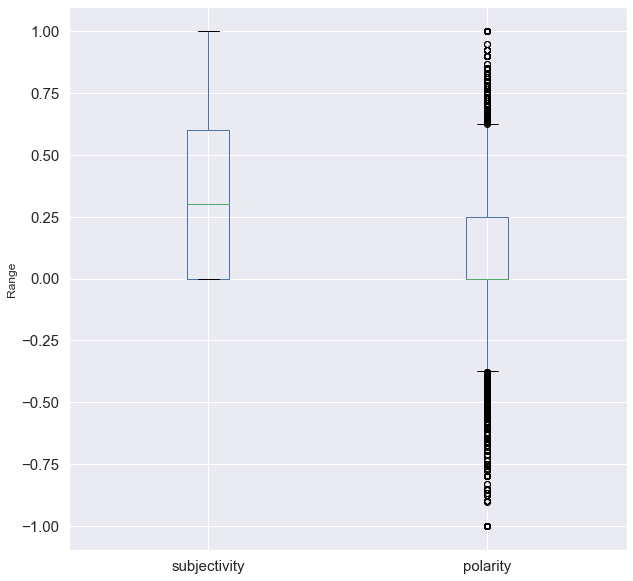

In [116]:
#boxplot for dffilter

boxplot = dffilter.boxplot(column=['subjectivity','polarity'], 
                     fontsize = 15,grid = True, vert=True,figsize=(10,10,))
plt.ylabel('Range');

## 6.2. SCATTER PLOT : 

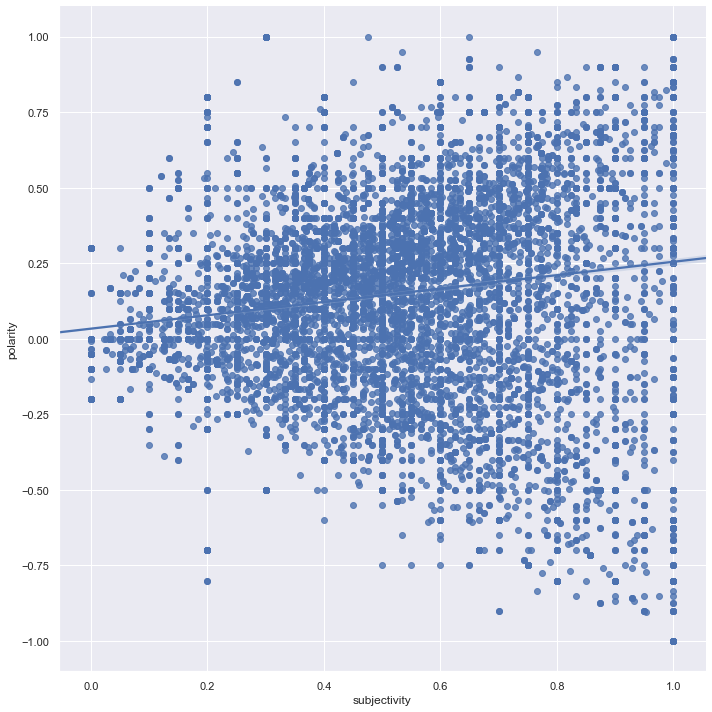

In [117]:
#scatter for dffilter

sns.lmplot(x='subjectivity',y='polarity',data=dffilter,fit_reg=True,scatter=True, height=10,palette="mute");

* **The scatter diagram is used to find the covariance and correlation between two variables. `This diagram helps you determine how closely the two variables are related.` After determining the correlation between the variables, you can then predict the behavior of the dependent variable based on the measure of the independent variable.**

## 6.3 Calculating Covariance and Correlation : 

In [118]:
#covariance and correlation for dffilter
# calculate the covariance between two variables

from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr

# prepare data
data1 = df_filter['subjectivity']
data2 = data1 + df_filter['polarity']
# calculate covariance matrix
covariance = cov(data1, data2) 
print(covariance)

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

[[0.06314593 0.06482409]
 [0.06482409 0.21555728]]
Pearsons correlation: 0.55563


* **The covariance between the two variables is  `0.06482409`. We can see that it is positive, suggesting the variables change in the same direction as we expect.**

* **We can see that the two variables are positively correlated and that the correlation is `0.55563`. This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.**

* **`Observation :` The plot shows a positive correlation between Subjectivity and Polarity.**

* **This means that :**

* **`as subjectivity increase, the polarity in the response increase too, Or in other words, the more strong feelings are expressed, the more the overall comment is subjective.`**

## 6.4. POLARITY DISTRIBUTION & DENSITY CURVE : 

The polarity distribution describes all the values of the variable Polarity within a given range. This range will be bounded between the minimum and maximum possible values (-1 to +1 in our case). By looking at the distribution we can identify how the polarity is distributed among clients and key factors as mean, median and standard deviation.

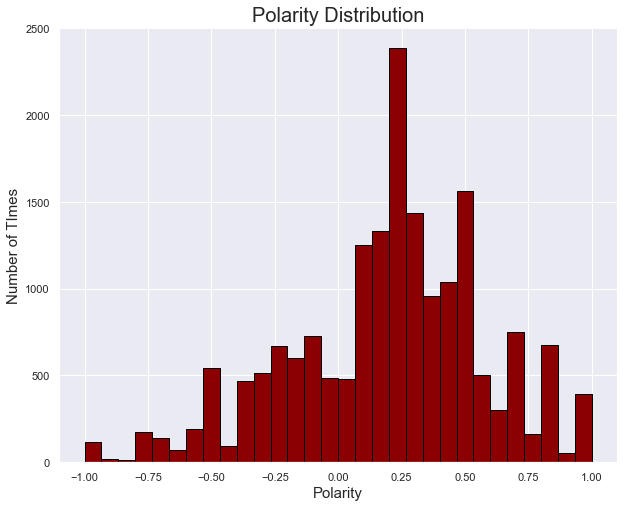

In [134]:
#Polarity Distribution for dffilter

plt.hist(df_filter['polarity'], color = 'darkred', edgecolor = 'black', density=False,
         bins = int(30))
plt.title('Polarity Distribution', fontsize = 20)
plt.xlabel("Polarity",fontsize = 15)
plt.ylabel("Number of TImes",fontsize = 15)

from pylab import rcParams
rcParams['figure.figsize'] = 10,8;

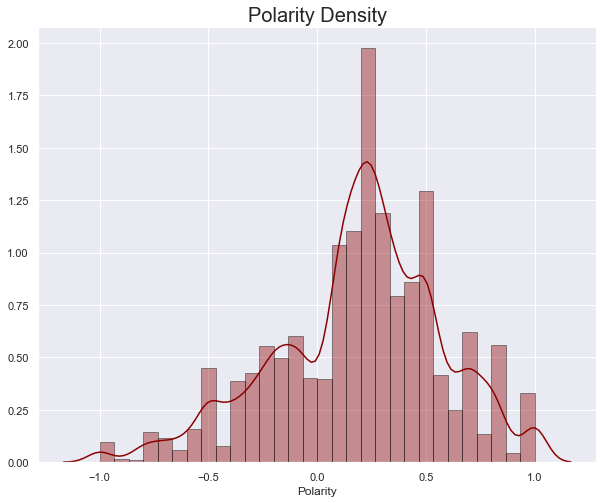

In [135]:
# Density Curve : 

sns.distplot(df_filter['polarity'], hist=True, kde=True, 
             bins=int(30), color = 'darkred',
             hist_kws={'edgecolor':'black'},axlabel ='Polarity')
plt.title('Polarity Density', fontsize = 20)

from pylab import rcParams
rcParams['figure.figsize'] = 10,8;

## 6.5 FREQUENT WORDS : 

* **Frequently we want to know which words are the most common from survey s since we are looking for some patterns.**

In [139]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')

# removing symbols that might appear as frequent

RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (df_filter.tweet
           .str.lower()
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'', RE_stopwords], [' ', '','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split()
)

In [141]:
'''top 10 commonly used words across the tweets.'''

from collections import Counter

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
rslt

'top 10 commonly used words across the tweets.'

,Frequency
Word,
new,983
positive,929
thankful,887
good,841
life,822
smile,768
get,669
like,638
today,635


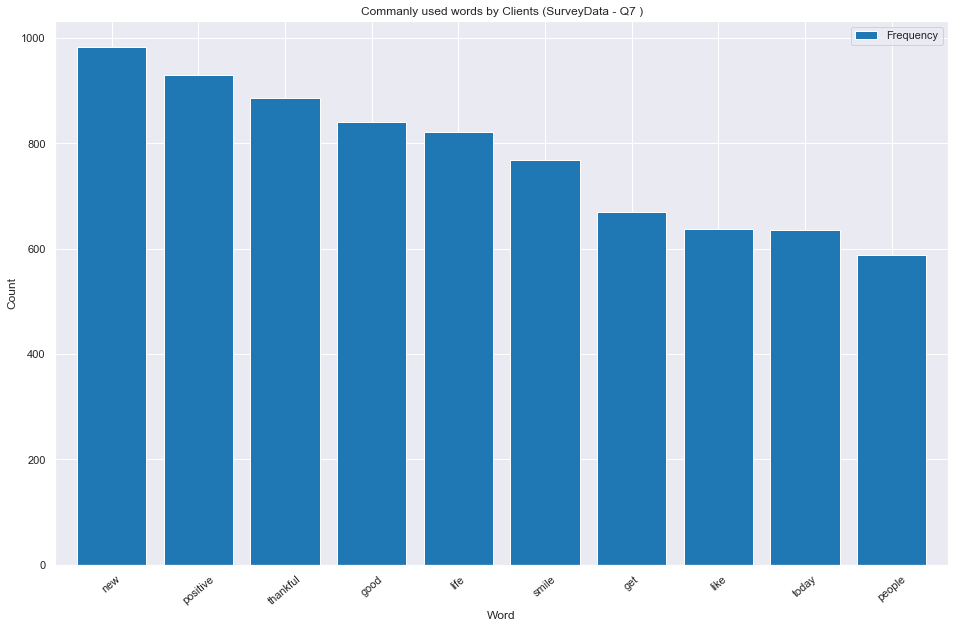

In [150]:
rslt_wordcloud = pd.DataFrame(Counter(words).most_common(100),
                    columns=['Word', 'Frequency'])
#BAR CHART
rslt.plot.bar(rot=40, figsize=(16,10), width=0.8,colormap='tab10')
plt.title("Commanly used words by Clients (SurveyData - Q7 )")
plt.ylabel("Count")

from pylab import rcParams
rcParams['figure.figsize'] = 10,8;

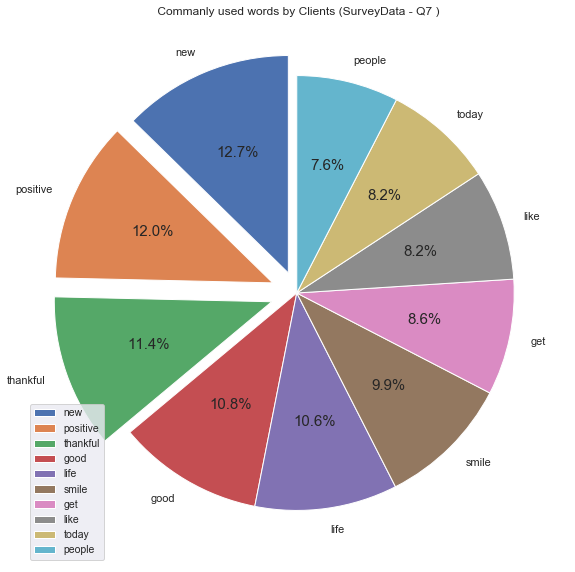

In [151]:
#PIE CHART

explode = (0.1, 0.12, 0.122, 0,0,0,0,0,0,0)  # explode 1st slice
labels=['new',
        'positive',
        'thankful',
        'good',
        'life',
        'smile',
        'get',
        'like',
        'today',
        'people',]

plt.pie(rslt['Frequency'], explode=explode,labels =labels , autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.legend( labels, loc='lower left',fontsize='x-small',markerfirst = True)
plt.tight_layout()
plt.title(' Commanly used words by Clients (SurveyData - Q7 )')
plt.show();

import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0;

## 6.6 WORDCLOUD : 

In [154]:
# ! pip install wordcloud

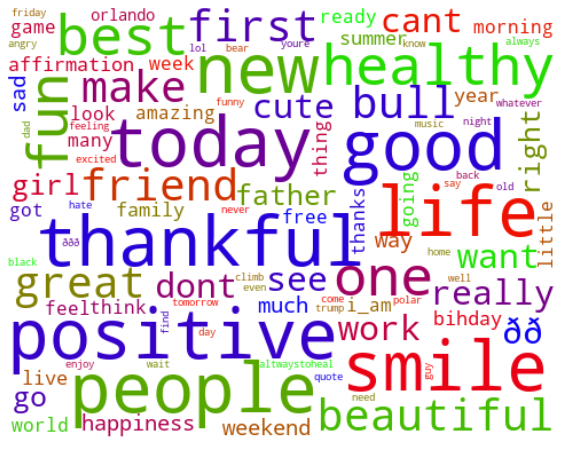

<Figure size 720x720 with 0 Axes>

In [161]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

wordcloud = WordCloud(max_font_size=60, max_words=100, width=480, height=380,colormap="brg",
                      background_color="white").generate(' '.join(rslt_wordcloud['Word']))
                      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show();

# Conclusions : 

* **Overall polarity demonstrates a positive value.**
* **Overall subjectivity is a positive value.**
* **Subjectivity and Polarity are moving towards the same direction as one increases, the other is likely to increase as well.**
* **In other words, the more strong feelings are expressed, the more the overall comment is subjective and vice versa.**

* **Responses to the question “what did we do well” demonstrated a positive polarity (mean 0.0.190378 and standard deviation 0.386076 where polarity can range from negative -1.0 to positive 1.0 ) with a strong level of subjectivity in responses (mean 0.560551 and standard deviation 0.251289 where 0.0 is very objective and 1.0 is very subjective). This information proves us that “most responses to this question were of a positive, subjective nature.”**